# Analysis of the express algorithm


In [1]:
%pylab inline
import pandas as pd
import numpy as np

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib


In [11]:
dfexpress = pd.read_csv('data/expressscores2019-01-03T1641.csv')
dfexpress = dfexpress.replace(-1.00, np.nan)
dfexpress = dfexpress.sort_values(by=['block_number']) 

In [12]:
def stats(df):
    df['priceGweiSlow'] = df['priceSlow'].apply(lambda x: x/1e9)
    df['priceGweiStandard'] = df['priceStandard'].apply(lambda x: x/1e9)
    df['priceGweiFast'] = df['priceFast'].apply(lambda x: x/1e9)
    df['priceGweiFastest'] = df['priceFastest'].apply(lambda x: x/1e9)
    
    avg_gaspriceslow = df["priceGweiSlow"].mean()
    avg_gaspricestandard = df["priceGweiStandard"].mean()
    avg_gaspricefast = df["priceGweiFast"].mean()
    avg_gaspricefastest = df["priceGweiFastest"].mean()
    
    std_gaspriceslow = df["priceGweiSlow"].std()
    std_gaspricestandard = df["priceGweiStandard"].std()
    std_gaspricefast = df["priceGweiFast"].std()
    std_gaspricefastest = df["priceFastest"].std()

    print("The average slow gas price is: " + str(avg_gaspriceslow) + " GWei. std: " + str(std_gaspriceslow))
    print("The average standard gas price is: " + str(avg_gaspricestandard) + " GWei. std: " + str(std_gaspricestandard))
    print("The average fast gas price is: " + str(avg_gaspricefast) + " GWei. std: " + str(std_gaspricefast))
    print("The average fastest gas price is: " + str(avg_gaspricefastest) + " GWei. std: " + str(std_gaspricefastest))


print("\n############### express ###################")
stats(dfexpress)


############### express ###################
The average slow gas price is: 2.0 GWei. std: 0.0
The average standard gas price is: 3.0 GWei. std: 0.0
The average fast gas price is: 9.96477495107632 GWei. std: 0.18452880703625407
The average fastest gas price is: 50.0 GWei. std: 0.0


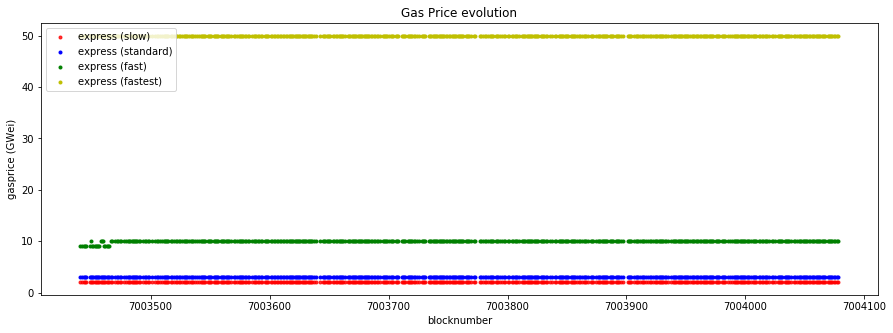

In [14]:
import matplotlib.pyplot as plt

x1 = dfexpress["block_number"].values
y1 = dfexpress["priceGweiSlow"].values

x2 = dfexpress["block_number"].values
y2 = dfexpress["priceGweiStandard"].values

x3 = dfexpress["block_number"].values
y3 = dfexpress["priceGweiFast"].values

x4 = dfexpress["block_number"].values
y4 = dfexpress["priceGweiFastest"].values


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)


ax.scatter(x1, y1, alpha=0.8, c='r', marker='.', label='express (slow)')
ax.scatter(x2,y2, c='b', marker='.', label='express (standard)')
ax.scatter(x3,y3, c='g',marker='.', label='express (fast)')
ax.scatter(x4, y4, c='y',marker='.', label='express (fastest)')


plt.xlabel('blocknumber')
plt.ylabel('gasprice (GWei)')
plt.title('Gas Price evolution')
plt.legend(loc=2)

In [15]:
def plotHist(values, title):
    plt.figure()
    plt.hist(values, bins=20, alpha=0.6)
    plt.ylabel('Count')
    plt.xlabel('Gas Price')
    
    mean = np.mean(values)
    std = np.std(values)

    title = title + ": avg = %.2f,  std = %.2f" % (mean, std)
    plt.title(title)

In [18]:
def getPercentage(cols):
    minScore = dfexpress[cols].min(axis=1)
    numberOfBlocks = minScore.count()
    numberOfBlocksWithoutInclusion = minScore.value_counts().get(100.000, None)
    if numberOfBlocksWithoutInclusion is None:
        numberOfBlocksWithoutInclusion = 0
    percentage = (100 / numberOfBlocks) * numberOfBlocksWithoutInclusion
    print(percentage)
    return percentage

9.019607843137255
0.9803921568627451
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Text(0.5, 1.0, 'express: fast prediction \n percentage not included in next 10 blocks')

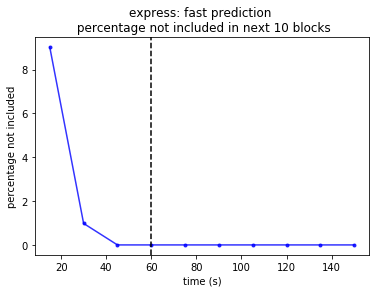

In [20]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreFastPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')
plt.axvline(x=60.0, color='k', linestyle='--')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('express: fast prediction \n percentage not included in next 10 blocks')

51.372549019607845
30.19607843137255
19.215686274509803
12.745098039215685
8.431372549019608
5.88235294117647
4.313725490196078
2.7450980392156863
1.9607843137254901
1.3725490196078431


Text(0.5, 1.0, 'express: slow prediction\n percentage not included in next 10 blocks')

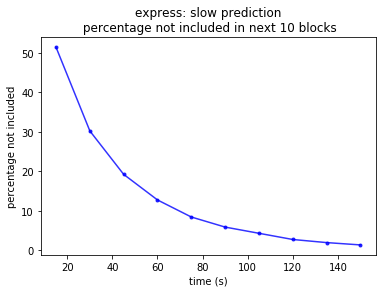

In [21]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreSlowPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('express: slow prediction\n percentage not included in next 10 blocks')

32.94117647058823
15.098039215686274
8.03921568627451
4.117647058823529
1.9607843137254901
0.7843137254901961
0.39215686274509803
0.19607843137254902
0.19607843137254902
0.19607843137254902


Text(0.5, 1.0, 'express: standard prediction\n percentage not included in next 10 blocks')

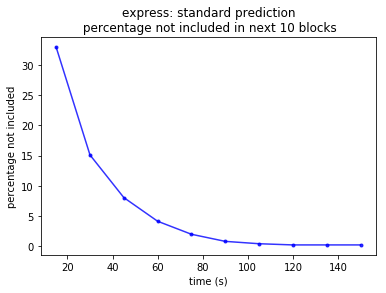

In [22]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreStandardPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('express: standard prediction\n percentage not included in next 10 blocks')

0.19607843137254902
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Text(0.5, 1.0, 'express: fastest prediction\n percentage not included in next 10 blocks')

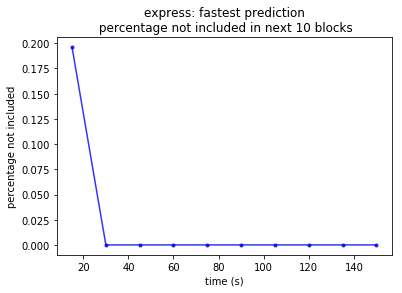

In [23]:
x = []
y = []
avg_blocktime = 15.0
cols = []
for idx in range(1, 11, 1):
    cols.append("scoreFastestPlus" + str(idx))
    percentage = getPercentage(cols)
    y.append(percentage)
    x.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, alpha=0.8, c='b', marker='.')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('express: fastest prediction\n percentage not included in next 10 blocks')

51.372549019607845
32.94117647058823
9.019607843137255
30.19607843137255
15.098039215686274
0.9803921568627451
19.215686274509803
8.03921568627451
0.0
12.745098039215685
4.117647058823529
0.0
8.431372549019608
1.9607843137254901
0.0
5.88235294117647
0.7843137254901961
0.0
4.313725490196078
0.39215686274509803
0.0
2.7450980392156863
0.19607843137254902
0.0
1.9607843137254901
0.19607843137254902
0.0
1.3725490196078431
0.19607843137254902
0.0


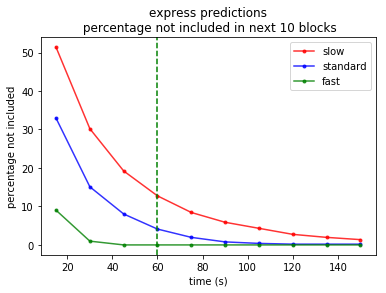

In [24]:
x1 = []
y1 = []
y2 = []
y3 = []
avg_blocktime = 15.0
colsSlow = []
colsStd = []
colsFast = []
for idx in range(1, 11, 1):
    colsSlow.append("scoreSlowPlus" + str(idx))
    colsStd.append("scoreStandardPlus" + str(idx))
    colsFast.append("scoreFastPlus" + str(idx))
    percentage1 = getPercentage(colsSlow)
    y1.append(percentage1)
    percentage2 = getPercentage(colsStd)
    y2.append(percentage2)
    percentage3 = getPercentage(colsFast)
    y3.append(percentage3)
    x1.append(idx * avg_blocktime)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, y1, alpha=0.8, c='r', marker='.', label='slow')
ax.plot(x1, y2, alpha=0.8, c='b', marker='.', label='standard')
ax.plot(x1, y3, alpha=0.8, c='g', marker='.', label='fast')
plt.axvline(x=60.0, color='g', linestyle='--')

plt.xlabel('time (s)')
plt.ylabel('percentage not included')
plt.title('express predictions\n percentage not included in next 10 blocks')
plt.legend(loc=1)